In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
print(f"X_train.shape: {X_train.shape}")

4422102/4422102 [==============================] - 0s 0us/step
X_train.shape: (60000, 28, 28)


In [4]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print(X_train.shape)

(60000, 28, 28, 1)


In [5]:
K = len(set(y_train))
print(f"Number of classes: {K}")

Number of classes: 10


In [6]:
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation="relu")(i)
x = Conv2D(64, (3, 3), strides=2, activation="relu")(x)
x = Conv2D(128, (3, 3), strides=2, activation="relu")(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation="softmax")(x)

model = Model(i, x)

In [7]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 19s 4ms/step - loss: 0.5233 - accuracy: 0.8060 - val_loss: 0.4034 - val_accuracy: 0.8449
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3636 - accuracy: 0.8632 - val_loss: 0.3580 - val_accuracy: 0.8669
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3180 - accuracy: 0.8797 - val_loss: 0.3173 - val_accuracy: 0.8798
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2811 - accuracy: 0.8942 - val_loss: 0.3116 - val_accuracy: 0.8888
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2535 - accuracy: 0.9038 - val_loss: 0.3153 - val_accuracy: 0.8864
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2347 - accuracy: 0.9108 - val_loss: 0.2947 - val_accuracy: 0.8950
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2170 - accuracy: 0.9181 - val_loss: 0.2953 - val_accuracy

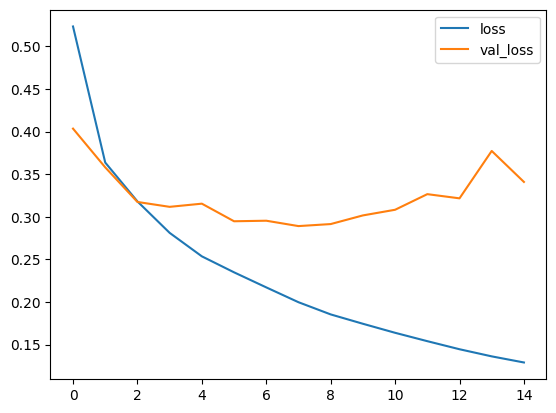

In [8]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

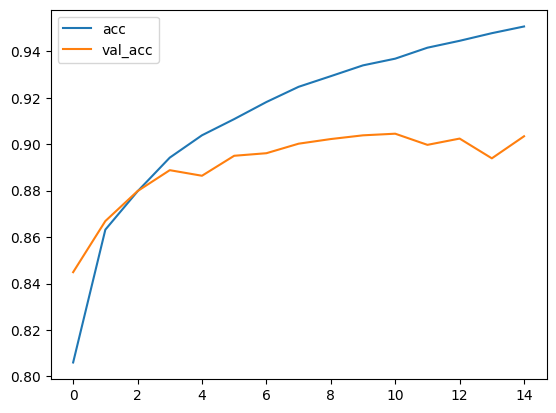

In [9]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 2s 4ms/step
Confusion matrix, without normalization
[[889   0  26  14   2   1  66   0   2   0]
 [  3 976   1  11   1   0   7   0   1   0]
 [ 13   1 885   7  43   0  51   0   0   0]
 [ 21  12  17 891  38   0  19   0   2   0]
 [  1   3  60  14 841   0  76   0   5   0]
 [  1   0   0   1   0 970   0  20   0   8]
 [125   0  82  22  90   0 674   0   7   0]
 [  0   0   0   0   0   6   0 976   0  18]
 [  6   0   4   1   5   1   5   2 975   1]
 [  1   0   0   0   0   4   0  38   0 957]]


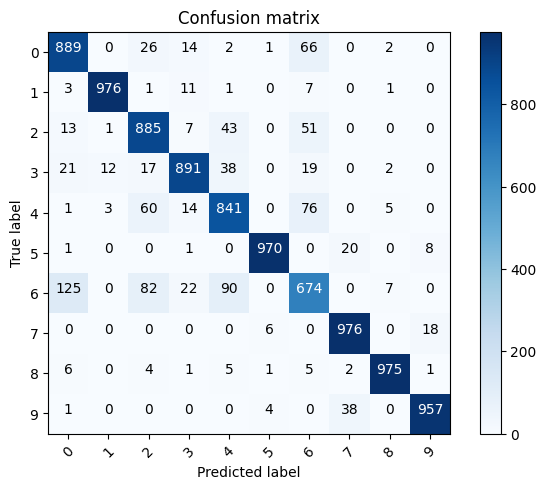

In [11]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [12]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

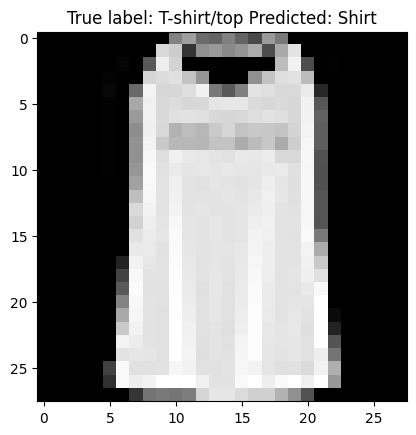

In [14]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));